In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
#Geradores de dados
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, rotation_range=20)
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Geradores
train_gen = train_datagen.flow_from_directory(
    './gender/treino', target_size=(96,96), batch_size=32, color_mode='grayscale', class_mode='binary')

val_gen = val_test_datagen.flow_from_directory(
    './gender/validacao', target_size=(96,96), batch_size=32, color_mode='grayscale',  class_mode='binary')

test_gen = val_test_datagen.flow_from_directory(
    './gender/teste', target_size=(96,96), batch_size=32, class_mode='binary', color_mode='grayscale',  shuffle=False)

Found 2722 images belonging to 2 classes.
Found 583 images belonging to 2 classes.
Found 586 images belonging to 2 classes.


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

model = Sequential([
    Input(shape=(96, 96, 1)),
    # 32 filtros de convolucao 3x3 na imagem
    # Usa funcao de ativacao relu
    Conv2D(32, (3, 3), activation='relu'),
    # Reduz o tamanho da imagem pela metade
    MaxPooling2D(2, 2),

    # 64 filtros de convolucao 3x3
    Conv2D(64, (3, 3), activation='relu'),
    # Reduz o tamanho pela metade
    MaxPooling2D(2, 2),

    # 128 filtros de convolucao 3x3
    Conv2D(128, (3, 3), activation='relu'),
    # Reduz pela metade
    MaxPooling2D(2, 2),

    # Achatando em um vetor
    Flatten(),

    # Zerando neuronios para evitar overfitting
    Dropout(0.5),

    # Camada densa (fully-connected)
    Dense(128, activation='relu'),

    # Camada de saida (binaria)
    # Usa sigmoid
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [4]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20
)

Epoch 1/20
86/86 [==============================] - 9s 53ms/step - loss: 0.6670 - accuracy: 0.5779 - val_loss: 0.5723 - val_accuracy: 0.6964
Epoch 2/20
86/86 [==============================] - 3s 32ms/step - loss: 0.5270 - accuracy: 0.7325 - val_loss: 0.4433 - val_accuracy: 0.7907
Epoch 3/20
86/86 [==============================] - 3s 32ms/step - loss: 0.4187 - accuracy: 0.8226 - val_loss: 0.5018 - val_accuracy: 0.7564
Epoch 4/20
86/86 [==============================] - 3s 33ms/step - loss: 0.3899 - accuracy: 0.8350 - val_loss: 0.3573 - val_accuracy: 0.8525
Epoch 5/20
86/86 [==============================] - 3s 33ms/step - loss: 0.3482 - accuracy: 0.8553 - val_loss: 0.3322 - val_accuracy: 0.8508
Epoch 6/20
86/86 [==============================] - 3s 33ms/step - loss: 0.3086 - accuracy: 0.8722 - val_loss: 0.3141 - val_accuracy: 0.8611
Epoch 7/20
86/86 [==============================] - 3s 33ms/step - loss: 0.2983 - accuracy: 0.8773 - val_loss: 0.2920 - val_accuracy: 0.8765
Epoch 8/20
86

In [5]:
loss, acc = model.evaluate(test_gen)
print(f"Acurácia no teste: {acc:.2f}")

19/19 [==============================] - 0s 18ms/step - loss: 0.1872 - accuracy: 0.9249
Acurácia no teste: 0.92


In [6]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Previsões
y_true = test_gen.classes
y_pred = (model.predict(test_gen) > 0.5).astype("int32")

print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred, target_names=['masculino', 'feminino']))

19/19 [==============================] - 0s 11ms/step
[[264  29]
 [ 15 278]]
              precision    recall  f1-score   support

   masculino       0.95      0.90      0.92       293
    feminino       0.91      0.95      0.93       293

    accuracy                           0.92       586
   macro avg       0.93      0.92      0.92       586
weighted avg       0.93      0.92      0.92       586



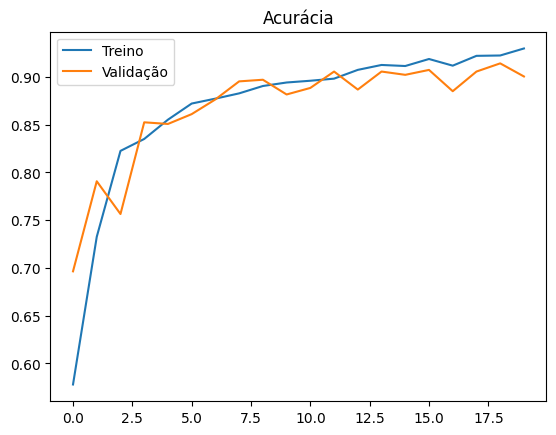

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia')
plt.legend()
plt.show()

In [8]:
model.save('modelo_genero.keras')